## Bankruptcy Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns',None)
pd.set_option('display.max.rows',100)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset

df = pd.read_csv(r"G:\My Drive\Professional\Data Science\Projects\Bankruptcy Prediction\BANKRUPTCY_PREDICTION.csv")

In [4]:
df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan �,Operating Profit Per Share (Yuan �,Per Share Net profit before tax (Yuan �,Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256970e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820930e-04,1.165010e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897850e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.7

In [5]:
df.shape

(6819, 95)

### Exploratory Data Analysis

In [6]:
# Checking missing values
df.isnull().sum().sum()

0

* ***The dataset does not contain any missing values***

In [7]:
#Checking for duplicated rows
df.duplicated().sum()

0

* ***The dataset does not contain any duplicate rows***

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

* ***All features are numerical***

In [9]:
df.columns = df.columns.str.strip()

In [10]:
# Checking for outliers
def outliers(df):
    outliers_df = pd.DataFrame(columns = ['Feature','Outlier_count','Outlier_percentage'])
    for col in df.columns:
        q1,q3 = df[col].quantile([0.25,0.75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr
        outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_df = outliers_df.append({'Feature':col,'Outlier_count':outliers.count(),'Outlier_percentage':outliers.count()*100/df[col].count()},ignore_index = True)
    return outliers_df.sort_values('Outlier_percentage',ascending = False)

In [11]:
outliers = outliers(df)

In [12]:
outliers

,Feature,Outlier_count,Outlier_percentage
91,Degree of Financial Leverage (DFL),1503,22.041355
92,Interest Coverage Ratio (Interest expense to E...,1421,20.838833
48,Fixed Assets Turnover Frequency,1418,20.794838
70,Current Asset Turnover Rate,1399,20.516205
28,Total Asset Growth Rate,1381,20.252236
34,Interest Expense Ratio,1362,19.973603
80,Cash Flow to Liability,1212,17.773867
87,No-credit Interval,1139,16.703329
8,Non-industry income and expenditure/revenue,1095,16.058073
74,Cash Flow to Sales,1052,15.427482


* ***Large number of features have outliers***
    * *Therefore, we'll use median as measure of central tendency for feature analysis*
    * *Also we may need to remove some outliers during data preprocessing*

<Axes: xlabel='Bankrupt', ylabel='count'>

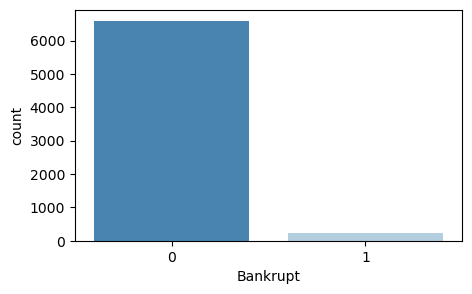

In [13]:
# Checking for imbalance
plt.figure(figsize = (5,3))
sns.countplot(data = df,x= 'Bankrupt',palette = 'Blues_r')

In [14]:
df['Bankrupt'].value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

* ***Dataset is highly imbalanced***
    * *We need to handle the imbalance during data preprocessing*

In [15]:
# Splitting the dependent & independent features
X = df.drop('Bankrupt',axis= 1)
y = df['Bankrupt']

In [16]:
# Checking the top correlated features with dependent features
feature_corr = X.corrwith(y).sort_values(ascending = False)
top_corr = feature_corr[:10].index.tolist() + feature_corr[-11:-1].index.tolist()
top_corr.remove('Liability-Assets Flag')
correlated = pd.concat([df[top_corr],df['Bankrupt']],axis = 1)

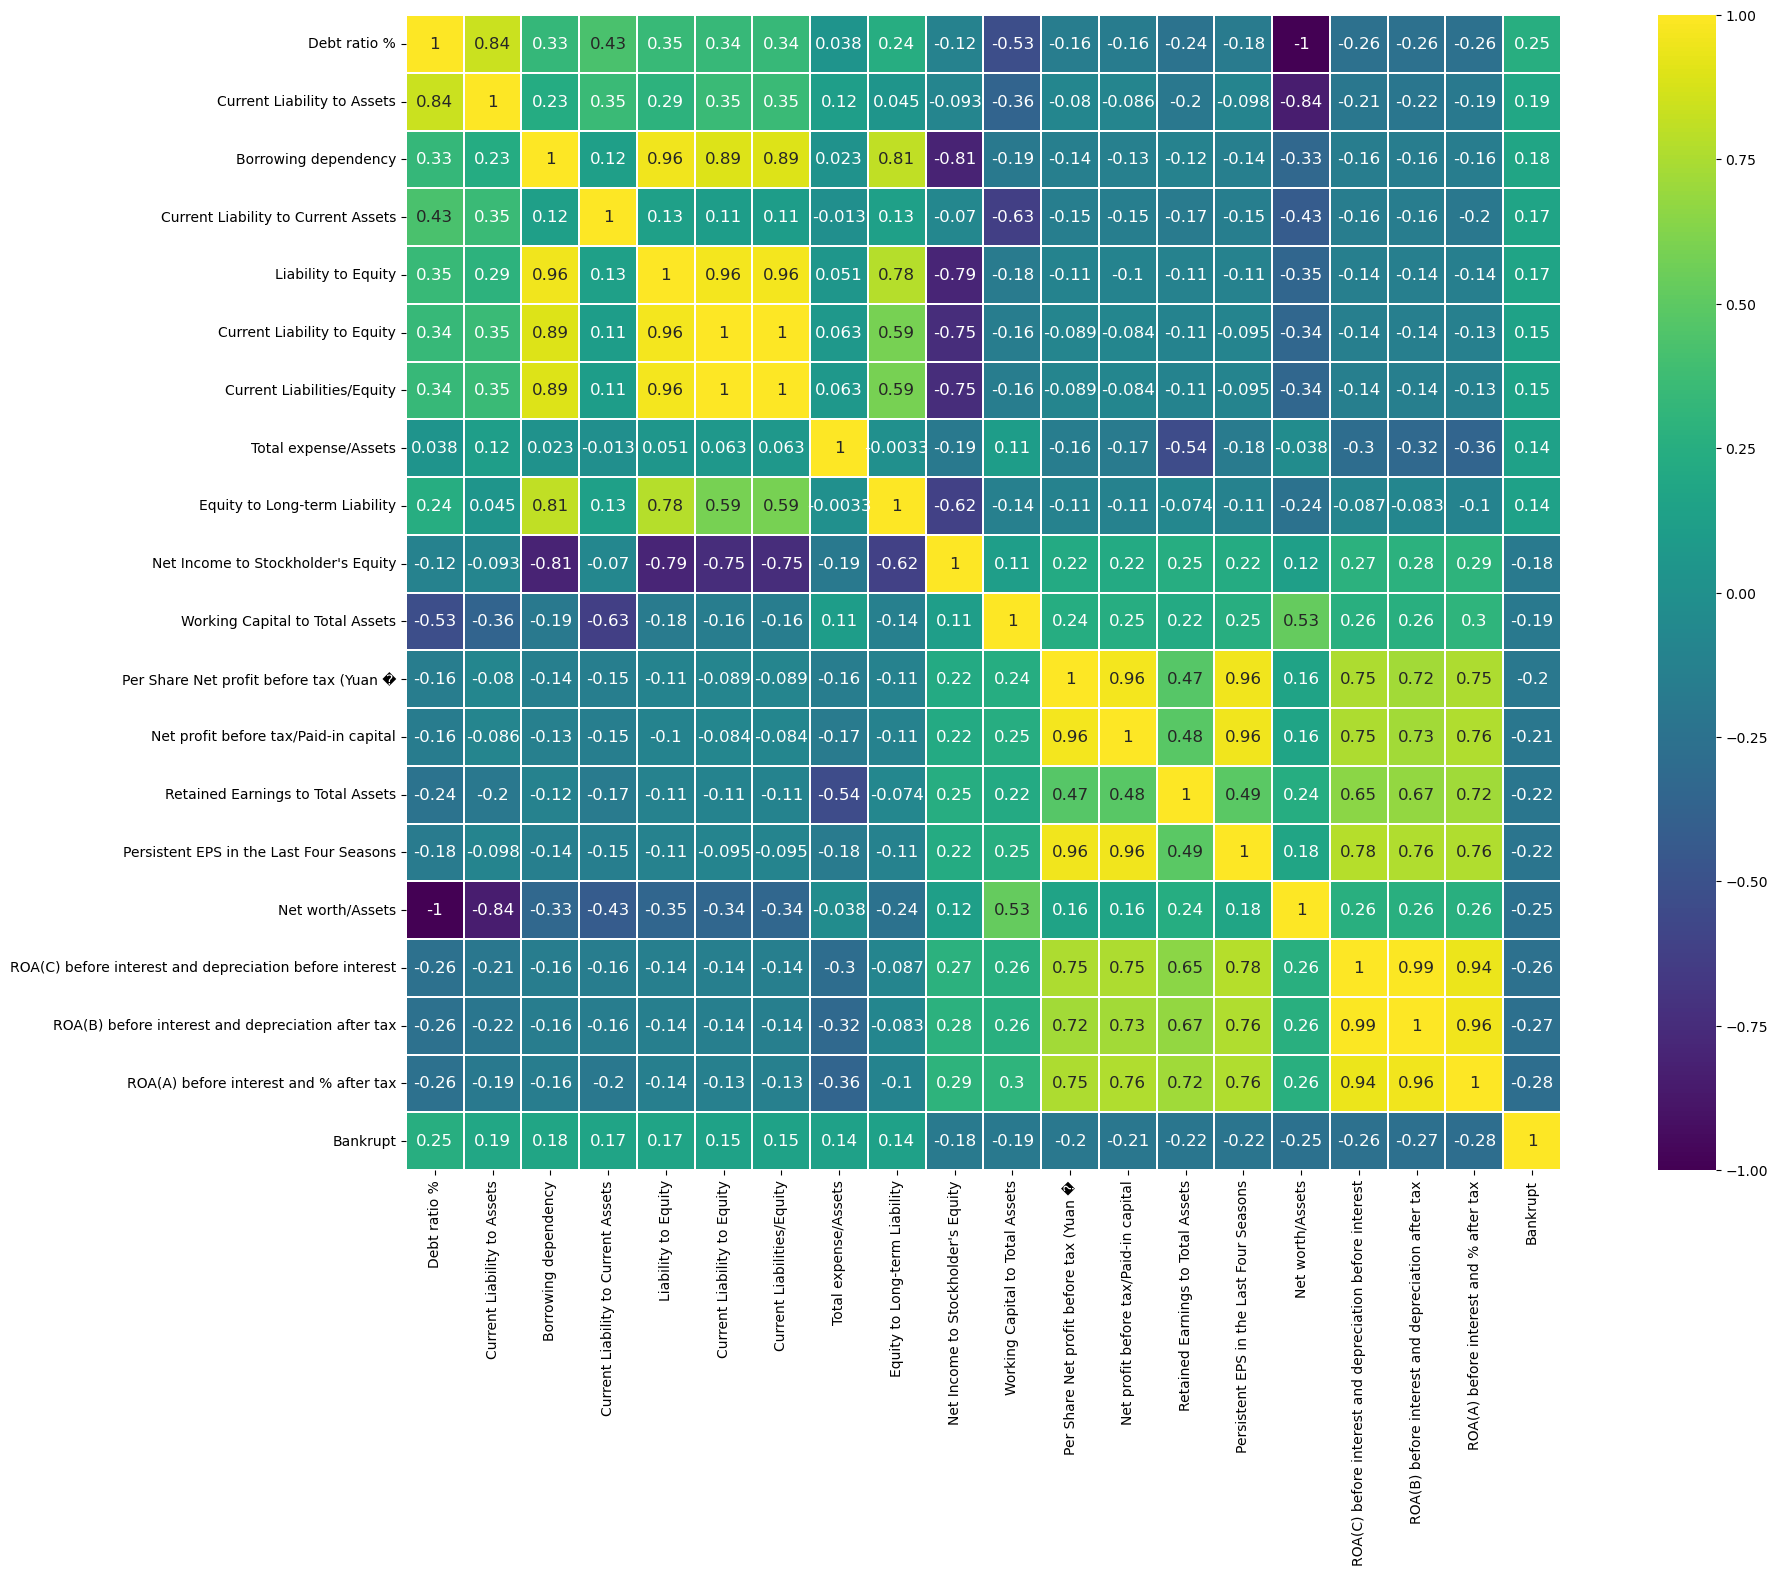

In [17]:
plt.figure(figsize = (25,15))
sns.heatmap(correlated.corr(),linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor="white",annot_kws = {'size':12})
plt.show()

* ***Features "Liability to Equity" and "Borrowing dependency" are highly correlated***
* ***'Net profit before tax/Paid-in capital' is highly correlated with 'Per Share Net profit before tax (Yuan �'***
* ***'Persistent EPS in the Last Four Seasons' is highly correlated with 'Net profit before tax/Paid-in capital'***

<Axes: xlabel="Net Income to Stockholder's Equity", ylabel='Equity to Long-term Liability'>

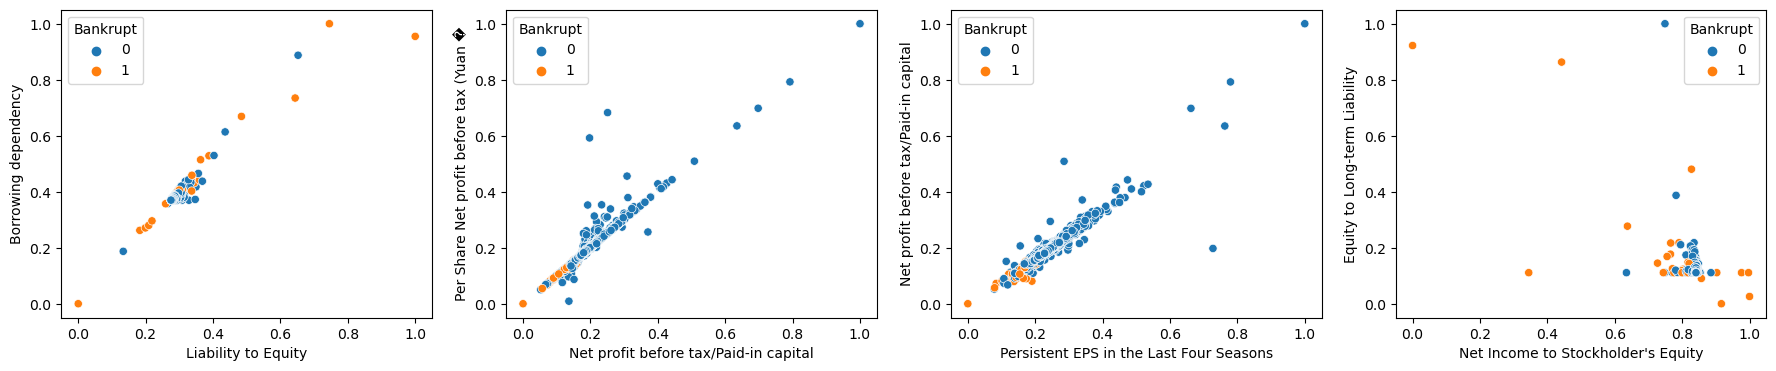

In [18]:
fig, ax = plt.subplots(1,4, figsize=(22, 4))

sns.scatterplot(data = correlated,x = 'Liability to Equity',y = 'Borrowing dependency',hue = 'Bankrupt',ax = ax[0])
sns.scatterplot(data = correlated,x = 'Net profit before tax/Paid-in capital',y = 'Per Share Net profit before tax (Yuan �',hue = 'Bankrupt',ax = ax[1])
sns.scatterplot(data = correlated,x = 'Persistent EPS in the Last Four Seasons',y = 'Net profit before tax/Paid-in capital',hue = 'Bankrupt',ax = ax[2])
sns.scatterplot(data = correlated,x = "Net Income to Stockholder's Equity",y = 'Equity to Long-term Liability',hue = 'Bankrupt',ax = ax[3])

* ***There are many non-bankrupt companies with 'Borrowing dependency' around 0.4.***
    * *Though it does not guarantee no-bankruptcy (some bankrupt companies are also present).However it seems having a lower or upper value impacts bankruptcy.* 
* ***There's a visible pattern that indicates companies with low value (<0.2) of 'Per Share Net profit before tax (Yuan �'/ 'Net profit before tax/Paid-in capital'/ 'Persistent EPS in the Last Four Seasons' tend to go bankrupt.***
* ***Having 'Net Income to Stockholder's Equity' value around 0.8 may safeguard a company from bankruptcy.Though it does not guarantee it.***

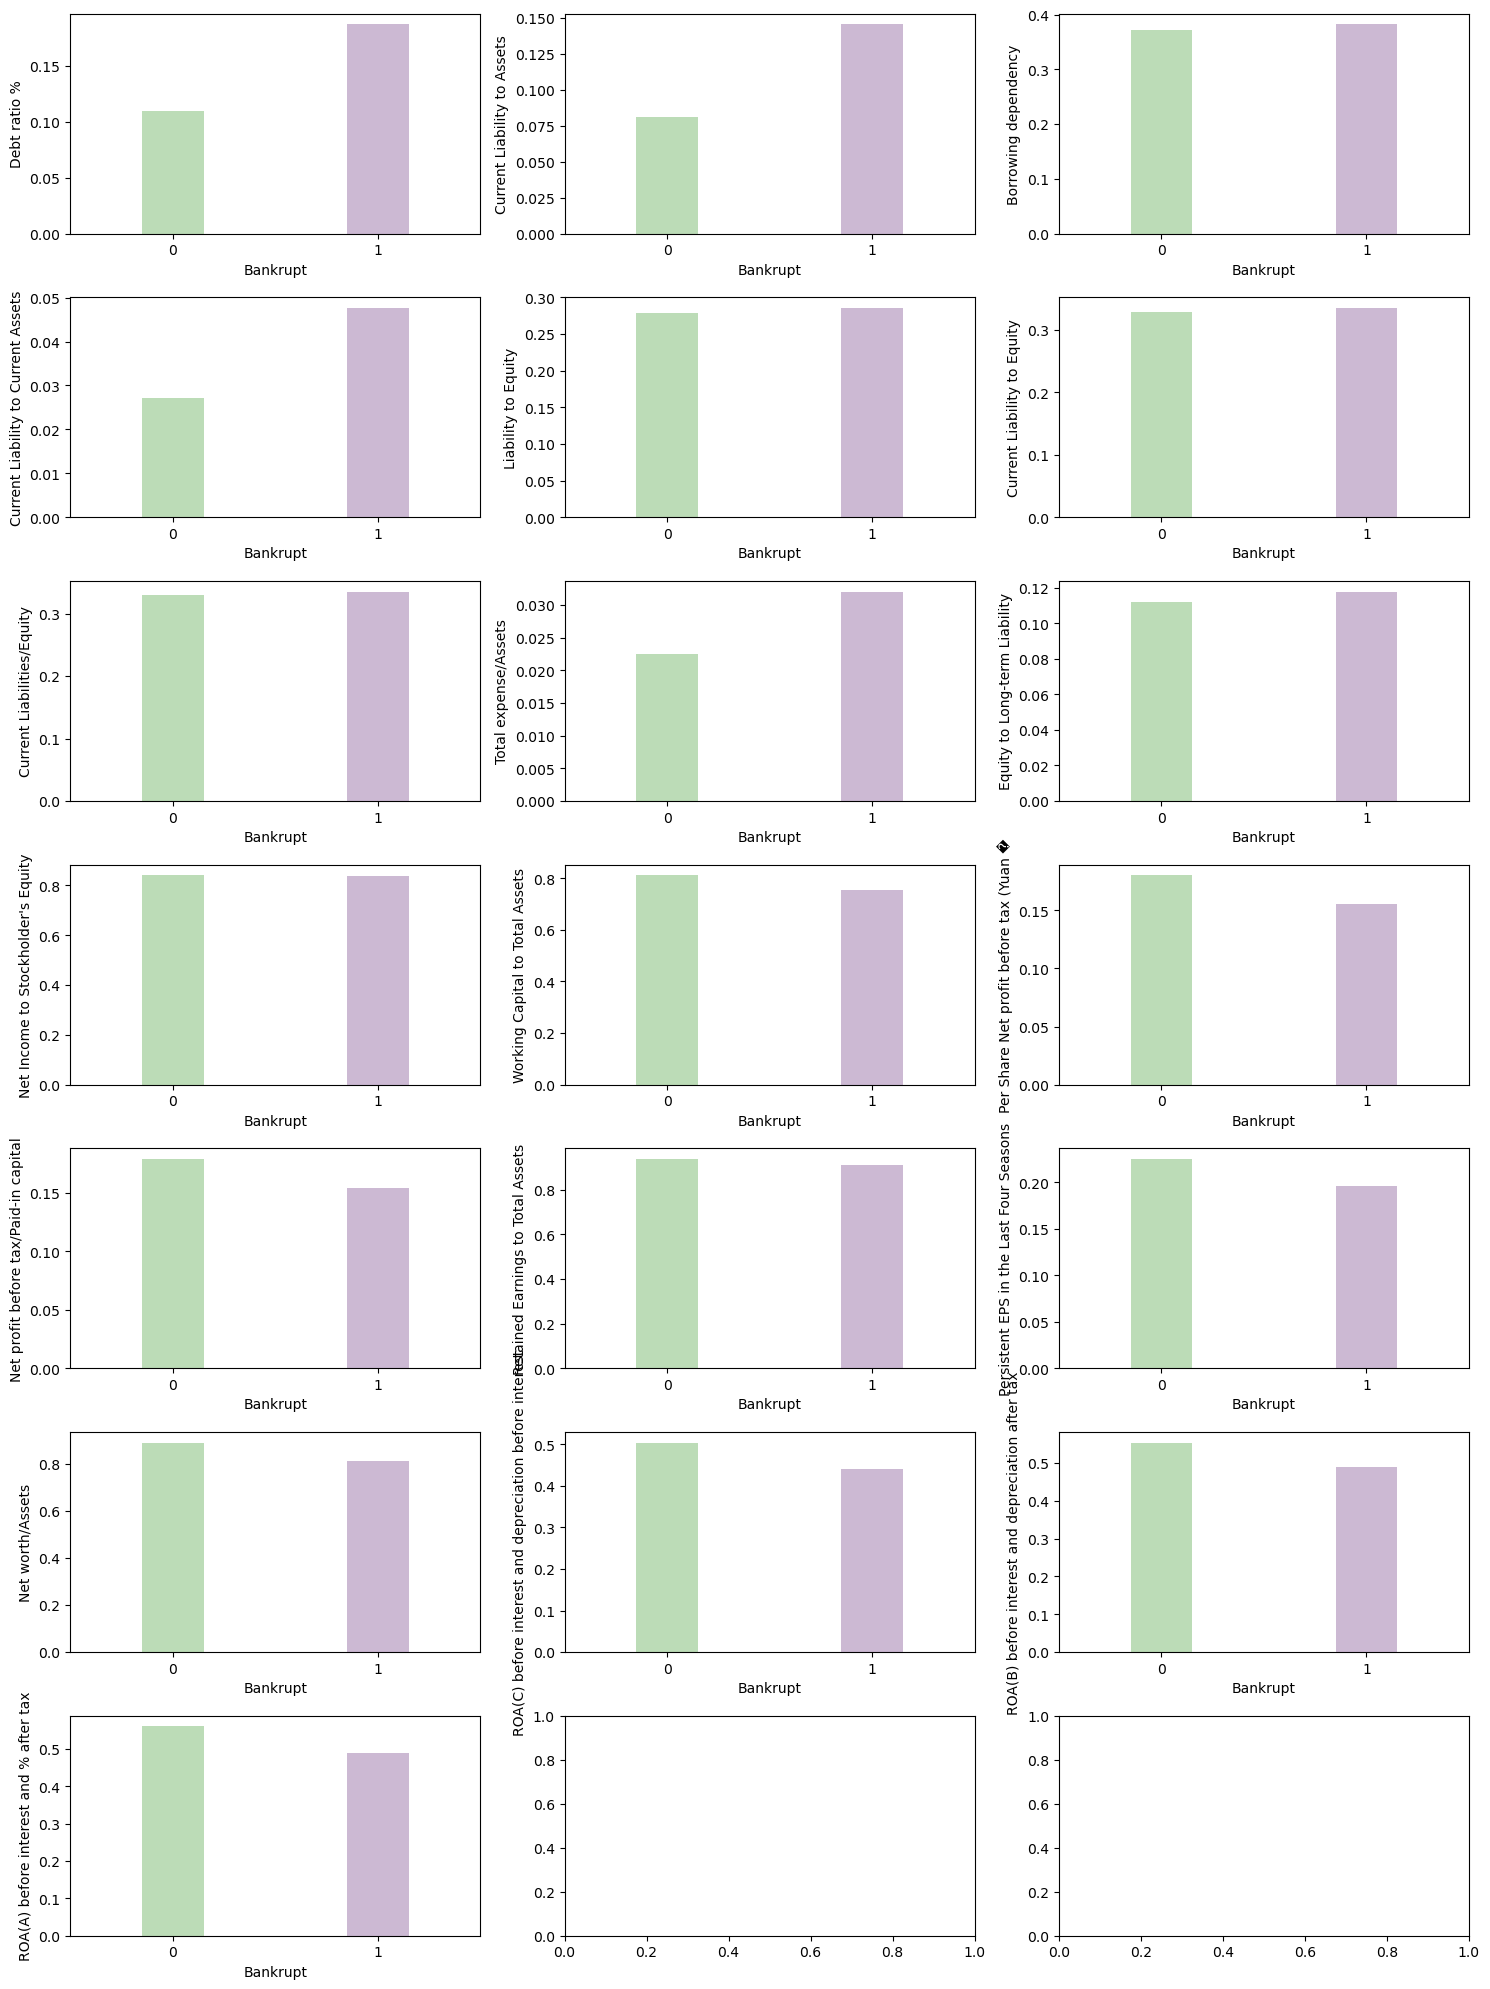

In [19]:
correlated_med = correlated.groupby('Bankrupt').median().reset_index()

fig, ax = plt.subplots(ncols=3, nrows=7, figsize=(15, 20))
ax = ax.flatten()
index = 0
for col in top_corr:
  sns.barplot(data = correlated_med,x = 'Bankrupt', y = col,ax=ax[index],palette = 'PRGn_r',width = 0.3)
  index +=1
plt.tight_layout()
plt.show()

In [20]:
correlated_med

,Bankrupt,Debt ratio %,Current Liability to Assets,Borrowing dependency,Current Liability to Current Assets,Liability to Equity,Current Liability to Equity,Current Liabilities/Equity,Total expense/Assets,Equity to Long-term Liability,Net Income to Stockholder's Equity,Working Capital to Total Assets,Per Share Net profit before tax (Yuan �,Net profit before tax/Paid-in capital,Retained Earnings to Total Assets,Persistent EPS in the Last Four Seasons,Net worth/Assets,ROA(C) before interest and depreciation before interest,ROA(B) before interest and depreciation after tax,ROA(A) before interest and % after tax
0,0,0.109381,0.081072,0.372474,0.027133,0.278671,0.329596,0.329596,0.022539,0.112228,0.841232,0.811822,0.180236,0.179021,0.938058,0.225111,0.890619,0.504314,0.553563,0.561219
1,1,0.187426,0.145603,0.382655,0.047675,0.285852,0.335518,0.335518,0.032035,0.117933,0.836707,0.752867,0.155306,0.154012,0.912923,0.195944,0.812574,0.441330,0.488597,0.490215


* ***Companies with high values of below parameters tend to go bankrupt:***
    * *'Debt ratio %' (~0.187426)*
    * *'Current Liability to Assets'(~0.145603)*
    * *'Current Liability to Current Assets' (~0.047675)*
    * *'Total expense/Assets (~0.032035)*
    
* ***Companies with low values of below parameters tend to go bankrupt:***
    * *'Working Capital to Total Assets'(~0.752867)*
    * *'Per Share Net profit before tax (Yuan � (~0.155306)*
    * *'Net profit before tax/Paid-in capital' (~0.154012)*
    * *'Persistent EPS in the Last Four Seasons' (~0.195944)*
    * *'Net worth/Assets' (~0.812574)*
    * *'ROA(C) before interest and depreciation before interest' (~0.441330)*
    * *'ROA(B) before interest and depreciation after tax' (~0.488597)*
    * *'ROA(A) before interest and % after tax' (~0.490215)*

<Axes: xlabel='Liability-Assets Flag', ylabel='count'>

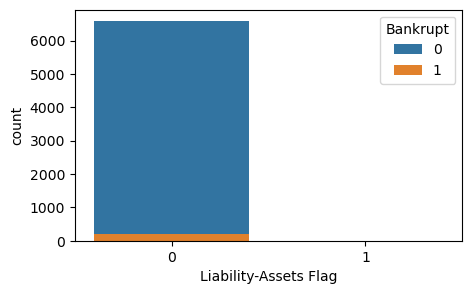

In [22]:
plt.figure(figsize = (5,3))
sns.countplot(data = df,x = 'Liability-Assets Flag',hue = 'Bankrupt',dodge = False)

In [24]:
df[['Liability-Assets Flag','Bankrupt']].value_counts(normalize = True)

Liability-Assets Flag  Bankrupt
0                      0           0.967444
                       1           0.031383
1                      1           0.000880
                       0           0.000293
dtype: float64

* ***A small portion of companies with 'Liability-Assets Flag' = 0 have gone bankrupt***

### Data Modelling

In [25]:
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [26]:
# Splitting the train-test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 42)
print(X_train.shape,X_test.shape)

(4773, 94) (2046, 94)


In [27]:
# Function to build models
all_models = pd.DataFrame(columns=['Algorithm','Accuracy','Precision','Recall','F1 score','ROC-AUC score'])

def model_build(model_name,model,parameters):
    # Creating pipeline
    pipeline = imbpipeline(steps = [['smote',SMOTE(sampling_strategy = 'minority',random_state = 42)], # Oversampling using SMOTE
                                    ['scaler',StandardScaler()],  # Scaling using Standard Scaler
                                    ['classifier',model]])  # model   

    # Stratified Kfold
    skf = StratifiedKFold(n_splits=3,
                          shuffle=True,
                          random_state=11)

    # Parameters for hyperparameter tuning
    param_grid = parameters

    # Grid Search
    grid_search = GridSearchCV(estimator = pipeline,
                              param_grid = param_grid,
                              scoring = 'accuracy',
                              cv = skf,
                              n_jobs = -1)

    # Fitting the model
    grid_search.fit(X_train,y_train)

    # Evaluating the model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    test_accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)
    model = {}
    model['Algorithm'] = model_name
    model['Accuracy'] = round(test_accuracy,3)
    model['Precision'] = round(precision,3)
    model['Recall'] = round(recall,3)
    model['F1 score'] = round(f1,3)
    model['ROC-AUC score'] = round(roc_auc,3)
    
    print('*************{}*************'.format(model_name))
    print('Cross Validation Score:',grid_search.best_score_)
    print('Test Accuracy:',test_accuracy)
    print('Precision:',precision)
    print('Recall:',recall)
    print('F1-score:',f1)
    print('ROC-AUC score:',roc_auc)
    print('Classification_report:\n',classification_report(y_test,y_pred))
    
    return model,y_pred

In [28]:
# Logistic regression
parameters = {"classifier__penalty": ['l2'],
              'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'classifier__class_weight': ['balanced',None],
              'classifier__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

log_reg_model,log_reg_pred = model_build('Logistic Regression',LogisticRegression(random_state = 42),parameters)
all_models = all_models.append(log_reg_model,ignore_index = True)

*************Logistic Regression*************
Cross Validation Score: 0.8996438298763879
Test Accuracy: 0.8983382209188661
Precision: 0.19130434782608696
Recall: 0.6666666666666666
F1-score: 0.2972972972972973
ROC-AUC score: 0.7863636363636363
Classification_report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      1980
           1       0.19      0.67      0.30        66

    accuracy                           0.90      2046
   macro avg       0.59      0.79      0.62      2046
weighted avg       0.96      0.90      0.92      2046



In [29]:
# Random Forest
parameters = {'classifier__max_features' : ['auto', 'sqrt', 'log2'],
              'classifier__class_weight' : ['balanced','balanced_subsample'],
              'classifier__criterion' : ['gini', 'entropy'],
              'classifier__bootstrap' : [True,False]}

rf_model,rf_pred = model_build('Random Forest',RandomForestClassifier(random_state = 42),parameters)
all_models = all_models.append(rf_model,ignore_index = True)

*************Random Forest*************
Cross Validation Score: 0.9562120259794679
Test Accuracy: 0.9589442815249267
Precision: 0.37142857142857144
Recall: 0.3939393939393939
F1-score: 0.3823529411764706
ROC-AUC score: 0.6858585858585858
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1980
           1       0.37      0.39      0.38        66

    accuracy                           0.96      2046
   macro avg       0.68      0.69      0.68      2046
weighted avg       0.96      0.96      0.96      2046



In [30]:
# K-nearest neighbors
parameters = {'classifier__n_neighbors' : [2,3,4],  
              'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_model,knn_pred = model_build('KNN',KNeighborsClassifier(),parameters)
all_models = all_models.append(knn_model,ignore_index = True)

*************KNN*************
Cross Validation Score: 0.9344227948879112
Test Accuracy: 0.9354838709677419
Precision: 0.2421875
Recall: 0.4696969696969697
F1-score: 0.3195876288659794
ROC-AUC score: 0.7103535353535353
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      1980
           1       0.24      0.47      0.32        66

    accuracy                           0.94      2046
   macro avg       0.61      0.71      0.64      2046
weighted avg       0.96      0.94      0.95      2046



In [31]:
# XGBoost
parameters = {'classifier__eta' : [0.1,0.01,0.001],  
              'classifier__eval_metric': ['logloss'],
              'classifier__max_depth' : [3,6,9],
              'classifier__lambda' : [1,1.5,2],      
              'classifier__alpha' : [0,0.5,1]}

xgb_model,xgb_pred = model_build('XGBoost',XGBClassifier(random_state = 42),parameters)
all_models = all_models.append(xgb_model,ignore_index = True)

*************XGBoost*************
Cross Validation Score: 0.954954954954955
Test Accuracy: 0.9618768328445748
Precision: 0.42857142857142855
Recall: 0.5454545454545454
F1-score: 0.4799999999999999
ROC-AUC score: 0.7606060606060606
Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1980
           1       0.43      0.55      0.48        66

    accuracy                           0.96      2046
   macro avg       0.71      0.76      0.73      2046
weighted avg       0.97      0.96      0.96      2046



In [32]:
all_models.sort_values('Recall',ascending = False)

,Algorithm,Accuracy,Precision,Recall,F1 score,ROC-AUC score
0,Logistic Regression,0.898,0.191,0.667,0.297,0.786
3,XGBoost,0.962,0.429,0.545,0.480,0.761
2,KNN,0.935,0.242,0.470,0.320,0.710
1,Random Forest,0.959,0.371,0.394,0.382,0.686


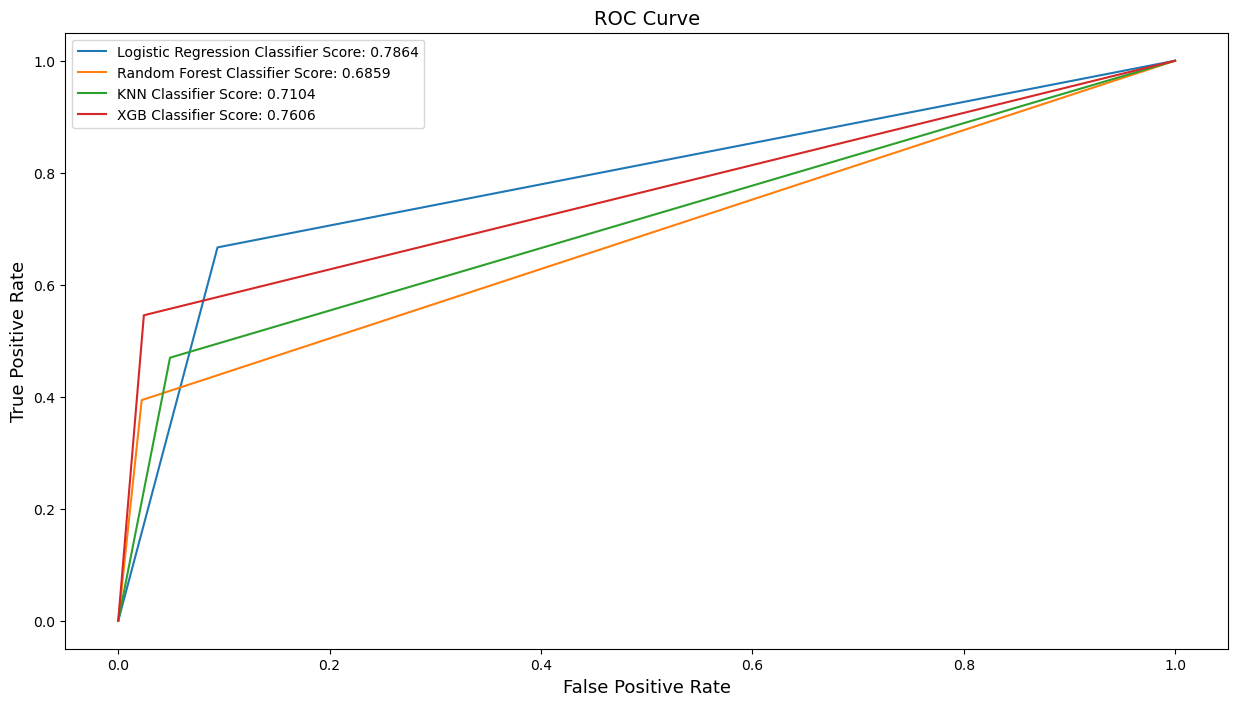

In [33]:
log_fpr,log_tpr,log_threshold = roc_curve(y_test,log_reg_pred)
rf_fpr,rf_tpr,rf_threshold = roc_curve(y_test,rf_pred)
knn_fpr,knn_tpr,knn_threshold = roc_curve(y_test,knn_pred)
xgb_fpr,xgb_tpr,xgb_threshold = roc_curve(y_test,xgb_pred)

plt.figure(figsize=(15,8))
plt.title('ROC Curve', fontsize=14)

plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_pred)))
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rf_pred)))
plt.plot(knn_fpr, knn_tpr, label='KNN Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knn_pred)))
plt.plot(xgb_fpr, xgb_tpr, label='XGB Classifier Score: {:.4f}'.format(roc_auc_score(y_test, xgb_pred)))

plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.legend()
plt.show()

* ***The Logistic Regression model has the highest "recall-score"***
    * ***This means the model is good at predicting companies tending towards Bankruptcy.***
    * ***However, this comes at a cost of low "precision-score" which means high number of false positives.***
        * *This could be exceptable in this scenario as companies identified under False Positive can become more cautious causing no harm as such.*

In [34]:
confusion_matrix(y_test,log_reg_pred)

array([[1794,  186],
       [  22,   44]], dtype=int64)

**Using Feature Selection**

In [74]:
#Mututal Info Classifier
mif = SelectKBest(mutual_info_classif,k = 30)
mif.fit(X,y)
X_sel = mif.transform(X)

In [75]:
# mif = SelectKBest(mutual_info_classif,k = 30)
# mif.fit(X,y)
# columns = X.columns[mif.get_support()]
# X_sel = X[columns]

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X_sel,y,test_size = 0.3,random_state = 42)

In [77]:
parameters = {"classifier__penalty": ['l2'],
              'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'classifier__class_weight': ['balanced',None],
              'classifier__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

log_reg_model_sel,log_reg_pred_sel = model_build('Logistic Regression',LogisticRegression(random_state = 42),parameters)

*************Logistic Regression*************
Cross Validation Score: 0.8642363293526083
Test Accuracy: 0.8636363636363636
Precision: 0.19637462235649547
Recall: 0.8333333333333334
F1-score: 0.31784841075794623
ROC-AUC score: 0.8490853658536586
Classification_report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      1968
           1       0.20      0.83      0.32        78

    accuracy                           0.86      2046
   macro avg       0.59      0.85      0.62      2046
weighted avg       0.96      0.86      0.90      2046



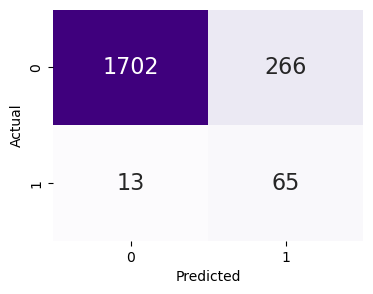

In [78]:
cm = confusion_matrix(y_test,log_reg_pred_sel)
cm_df = pd.DataFrame(cm,columns= np.unique(y_test),index = np.unique(y_test))
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
plt.figure(figsize = (4,3))
sns.heatmap(cm_df,annot = True,cmap = 'Purples',annot_kws={"size": 16},fmt='g',cbar = False)
plt.show()